In [2]:
from nba_api.stats.static import players
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_rows', 10)

# Get all players from nba_api and store in variable
playerList = players.get_players()

In [3]:
# Create a DataFrame of all Platers
players_df = pd.DataFrame(playerList)
players_df.head()

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False


In [4]:
# Cut down list to contain only ACTIVE players
act_df = players_df.loc[players_df["is_active"]==True]
act_df.head()

,id,full_name,first_name,last_name,is_active
21,203500,Steven Adams,Steven,Adams,True
23,1628389,Bam Adebayo,Bam,Adebayo,True
41,200746,LaMarcus Aldridge,LaMarcus,Aldridge,True
48,1629734,Kyle Alexander,Kyle,Alexander,True
50,1629638,Nickeil Alexander-Walker,Nickeil,Alexander-Walker,True


In [5]:
# Condensing DF to name/active status
act_df2 = act_df[["full_name","is_active"]]
act_df3 = act_df2.rename(columns={"full_name":"Player"})
act_df3.head()

,Player,is_active
21,Steven Adams,True
23,Bam Adebayo,True
41,LaMarcus Aldridge,True
48,Kyle Alexander,True
50,Nickeil Alexander-Walker,True


In [6]:
# act_df.to_csv("active_players.csv")

In [7]:
# Reading in xlsx file to dataframe
workbook = "2016-2020 Advanced Player Stats.xlsx"
all_dfs = pd.read_excel(workbook, sheet_name = None)

# Concatonating all sheets into single DF
ps_df = pd.concat(all_dfs, ignore_index = True)
# Dropping NaN columns
ps_df.dropna(axis=1, how = "all")

,Rank (WS),Player,Year,Pos,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Stephen Curry,2016,PG,27,GSW,79,2700,31.5,0.669,...,12.9,32.6,13.8,4.1,17.9,0.318,10.3,1.6,11.9,9.5
1,2,Kevin Durant,2016,SF,27,OKC,72,2578,28.2,0.634,...,13.5,30.6,11.0,3.5,14.5,0.270,8.4,1.6,9.9,7.8
2,3,Russell Westbrook,2016,PG,27,OKC,80,2750,27.6,0.554,...,16.8,31.6,10.0,4.0,14.0,0.245,6.4,1.4,7.8,6.8
3,4,Kawhi Leonard,2016,SF,24,SAS,72,2380,26.0,0.616,...,7.8,25.8,8.3,5.5,13.7,0.277,6.1,3.0,9.1,6.7
4,5,LeBron James,2016,SF,31,CLE,76,2709,27.5,0.588,...,13.2,31.4,9.6,4.0,13.6,0.242,7.0,2.0,9.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,510,Theo Pinson,2020,SG,24,BRK,33,365,5.2,0.370,...,16.9,22.4,-1.0,0.5,-0.6,-0.074,-6.9,-0.2,-7.1,-0.5
2542,511,Dwayne Bacon,2020,SG,24,CHO,39,687,6.1,0.419,...,12.2,19.5,-1.2,0.4,-0.8,-0.053,-5.9,-0.9,-6.8,-0.8
2543,512,Dennis Smith Jr.,2020,PG,22,NYK,34,537,7.5,0.399,...,19.8,23.1,-1.3,0.5,-0.9,-0.079,-5.2,-0.9,-6.1,-0.6
2544,513,Jordan Poole,2020,SG,20,GSW,57,1274,7.2,0.454,...,11.8,21.1,-1.6,0.4,-1.2,-0.047,-4.4,-2.2,-6.6,-1.5


In [8]:
# Merge Active Player DataFrame with Player Stats DataFrame
merged_ps = pd.merge(act_df3,ps_df,on="Player",how="outer")
merged_ps.head()

,Player,is_active,Rank (WS),Year,Pos,Age,Tm,G,MP,PER,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Steven Adams,True,44.0,2016.0,C,22.0,OKC,80.0,2014.0,15.5,...,14.1,12.6,4.2,2.3,6.5,0.155,0.0,0.2,0.2,1.1
1,Steven Adams,True,47.0,2017.0,C,23.0,OKC,80.0,2389.0,16.5,...,16.0,16.2,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1
2,Steven Adams,True,15.0,2018.0,C,24.0,OKC,76.0,2487.0,20.6,...,13.3,16.7,6.7,3.0,9.7,0.187,1.7,-0.6,1.1,2.0
3,Steven Adams,True,17.0,2019.0,C,25.0,OKC,80.0,2669.0,18.5,...,12.6,16.4,5.1,4.0,9.1,0.163,0.7,0.4,1.1,2.1
4,Steven Adams,True,21.0,2020.0,C,26.0,OKC,58.0,1564.0,20.8,...,14.1,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0


In [9]:
# Drop rows with N/A values
clean_active_ps = merged_ps.dropna(how="any")
clean_active_ps.head()

,Player,is_active,Rank (WS),Year,Pos,Age,Tm,G,MP,PER,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Steven Adams,True,44.0,2016.0,C,22.0,OKC,80.0,2014.0,15.5,...,14.1,12.6,4.2,2.3,6.5,0.155,0.0,0.2,0.2,1.1
1,Steven Adams,True,47.0,2017.0,C,23.0,OKC,80.0,2389.0,16.5,...,16.0,16.2,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1
2,Steven Adams,True,15.0,2018.0,C,24.0,OKC,76.0,2487.0,20.6,...,13.3,16.7,6.7,3.0,9.7,0.187,1.7,-0.6,1.1,2.0
3,Steven Adams,True,17.0,2019.0,C,25.0,OKC,80.0,2669.0,18.5,...,12.6,16.4,5.1,4.0,9.1,0.163,0.7,0.4,1.1,2.1
4,Steven Adams,True,21.0,2020.0,C,26.0,OKC,58.0,1564.0,20.8,...,14.1,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0


In [10]:
# Reading in player salary xlsx file
playerSalary = pd.read_excel("Player_Salary.xlsx")
playerSalary2 = playerSalary.rename(columns={"NAME":"Player"})
playerSalary2.head()

,RK,Player,Position,TEAM,SALARY
0,1,Stephen Curry,PG,Golden State Warriors,40231758
1,2,Chris Paul,PG,Oklahoma City Thunder,38506482
2,3,Russell Westbrook,PG,Houston Rockets,38506482
3,4,John Wall,PG,Washington Wizards,38199000
4,5,Kevin Durant,SF,Brooklyn Nets,38199000


In [11]:
# Merge player salary with active player dataframe
APS = pd.merge(clean_active_ps,playerSalary2,on="Player",how="outer")
ActivePlayerStats = APS.dropna(how = "any")
ActivePlayerStats.head()

,Player,is_active,Rank (WS),Year,Pos,Age,Tm,G,MP,PER,...,WS,WS/48,OBPM,DBPM,BPM,VORP,RK,Position,TEAM,SALARY
0,Steven Adams,True,44.0,2016.0,C,22.0,OKC,80.0,2014.0,15.5,...,6.5,0.155,0.0,0.2,0.2,1.1,41.0,C,Oklahoma City Thunder,25842697.0
1,Steven Adams,True,47.0,2017.0,C,23.0,OKC,80.0,2389.0,16.5,...,6.5,0.130,-0.2,0.0,-0.2,1.1,41.0,C,Oklahoma City Thunder,25842697.0
2,Steven Adams,True,15.0,2018.0,C,24.0,OKC,76.0,2487.0,20.6,...,9.7,0.187,1.7,-0.6,1.1,2.0,41.0,C,Oklahoma City Thunder,25842697.0
3,Steven Adams,True,17.0,2019.0,C,25.0,OKC,80.0,2669.0,18.5,...,9.1,0.163,0.7,0.4,1.1,2.1,41.0,C,Oklahoma City Thunder,25842697.0
4,Steven Adams,True,21.0,2020.0,C,26.0,OKC,58.0,1564.0,20.8,...,6.2,0.190,2.1,1.1,3.2,2.0,41.0,C,Oklahoma City Thunder,25842697.0


In [12]:
# Filter for players who played less than 1600 minutes but more than 1400 minutes
bp1 = ActivePlayerStats.loc[(ActivePlayerStats["MP"]<1600)&(ActivePlayerStats["MP"]>1400)]
bp1.head()

,Player,is_active,Rank (WS),Year,Pos,Age,Tm,G,MP,PER,...,WS,WS/48,OBPM,DBPM,BPM,VORP,RK,Position,TEAM,SALARY
4,Steven Adams,True,21.0,2020.0,C,26.0,OKC,58.0,1564.0,20.8,...,6.2,0.190,2.1,1.1,3.2,2.0,41.0,C,Oklahoma City Thunder,25842697.0
16,Jarrett Allen,True,104.0,2018.0,C,19.0,BRK,72.0,1441.0,17.5,...,4.2,0.141,-0.9,0.1,-0.8,0.5,303.0,C,Brooklyn Nets,2376840.0
55,OG Anunoby,True,166.0,2018.0,SF,20.0,TOR,74.0,1481.0,10.0,...,3.0,0.098,-1.2,0.6,-0.6,0.5,311.0,SF,Toronto Raptors,2281800.0
65,Trevor Ariza,True,161.0,2020.0,SF,34.0,TOT,53.0,1493.0,11.0,...,2.6,0.084,-1.5,0.9,-0.5,0.6,110.0,SF,Sacramento Kings,12195122.0
67,D.J. Augustin,True,282.0,2017.0,PG,29.0,ORL,78.0,1538.0,11.0,...,1.2,0.038,-1.2,-1.8,-3.0,-0.4,170.0,PG,Orlando Magic,7250000.0


In [13]:
# Identify bench players
bp_a = bp1.groupby(["Position", "Player"]).agg({'WS':"mean"})
bp_b = bp_a['WS'].groupby(level=0, group_keys=False)
bp_c = bp_b.apply(lambda x: x.sort_values(ascending=False))
bp_d = pd.DataFrame(bp_c.groupby("Position").head(1)).reset_index()
bp_f = bp_d.loc[bp_d["Position"]!=" G",:].reset_index()
bp_g = bp_f.rename(columns={"Player":"Bench_Player","WS":"Bench_WS"})
bp_h = bp_g.drop(columns=["index"])
bp_h

,Position,Bench_Player,Bench_WS
0,C,Mitchell Robinson,6.8
1,PF,Kevon Looney,6.0
2,PG,George Hill,5.9
3,SF,Gordon Hayward,5.0
4,SG,Fred VanVleet,4.7


In [14]:
# Identify starting players
sp_a = ActivePlayerStats.groupby(["Position", "Player"]).agg({'WS':"mean"})
sp_b = sp_a['WS'].groupby(level=0, group_keys=False)
sp_c = sp_b.apply(lambda x: x.sort_values(ascending=False))
sp_d = pd.DataFrame(sp_c)
sp_e = sp_d.groupby("Position").head(1).reset_index()
sp_f = sp_e.loc[(sp_e["Position"]!=" G")&(sp_e["Position"]!=" F"),:].reset_index()
sp_g = sp_f.rename(columns={"Player":"Starting_Player","WS":"Starting_WS"})
sp_h = sp_g.drop(columns=["index"])
sp_h

,Position,Starting_Player,Starting_WS
0,C,Rudy Gobert,10.64
1,PF,Giannis Antetokounmpo,11.24
2,PG,Damian Lillard,10.78
3,SF,Kevin Durant,12.10
4,SG,James Harden,14.08


In [15]:
# Creating the league winning roster (LWR)
LWR = pd.merge(sp_h,bp_h,on="Position",how = "outer")
LWR

,Position,Starting_Player,Starting_WS,Bench_Player,Bench_WS
0,C,Rudy Gobert,10.64,Mitchell Robinson,6.8
1,PF,Giannis Antetokounmpo,11.24,Kevon Looney,6.0
2,PG,Damian Lillard,10.78,George Hill,5.9
3,SF,Kevin Durant,12.10,Gordon Hayward,5.0
4,SG,James Harden,14.08,Fred VanVleet,4.7


In [16]:
# Calculating total salary of LWR
APS2 = ActivePlayerStats.loc[(ActivePlayerStats["Player"]=="Rudy Gobert")|
                (ActivePlayerStats["Player"]=="Giannis Antetokounmpo")|
                (ActivePlayerStats["Player"]=="Damian Lillard")|
                (ActivePlayerStats["Player"]=="Kevin Durant")|
                (ActivePlayerStats["Player"]=="James Harden")|
                (ActivePlayerStats["Player"]=="Mitchell Robinson")|
                (ActivePlayerStats["Player"]=="Kevon Looney")|
                (ActivePlayerStats["Player"]=="George Hill")|
                (ActivePlayerStats["Player"]=="Gordon Hayward")|
                (ActivePlayerStats["Player"]=="Fred VanVleet"),["Player","Year","SALARY"]]
APS3 = pd.DataFrame(APS2.groupby(APS2["Player"])["SALARY"].mean())
APS4 = APS3.append(APS3.sum().rename('Total'))
APS4

,SALARY
Player,
Damian Lillard,29802321.0
Fred VanVleet,9346153.0
George Hill,9133907.0
Giannis Antetokounmpo,25842697.0
Gordon Hayward,32700690.0
...,...
Kevin Durant,38199000.0
Kevon Looney,4464226.0
Mitchell Robinson,1599712.0


In [17]:
# ActivePlayerStats2 = ActivePlayerStats.loc[ActivePlayerStats.reset_index().groupby(["Position"])["WS"].idxmax()]
# ActivePlayerStats2
# df.loc[df.reset_index().groupby(['F_Type'])['to_date'].idxmax()]

In [18]:
#Reading in Team Stats excel file
workbook = "2016-2020 Regular Season Team Stats.xlsx"
all_dfs = pd.read_excel(workbook, sheet_name = None)

#concatonating sheets to single dataframe
ts_df = pd.concat(all_dfs, ignore_index = True)

#dropping NaN
ts_df.dropna(axis=1, how = "any")

,TEAM,Year,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,Atlanta Hawks,2016,82,48,34,3966,104.6,100.8,3.9,66.3,1.71,19.0,23.4,69.8,47.4,15.2,51.6,55.2,97.63,52.8
1,Boston Celtics,2016,82,48,34,3956,105.8,102.5,3.3,61.6,1.76,17.4,29.0,70.7,49.5,13.8,48.8,53.1,99.43,52.0
2,Brooklyn Nets,2016,82,21,61,3951,102.4,109.7,-7.4,58.3,1.51,17.0,27.9,71.6,49.4,15.3,49.2,52.7,96.12,46.0
3,Charlotte Hornets,2016,82,48,34,3971,106.4,103.7,2.7,58.6,1.73,16.7,24.4,75.4,49.9,12.9,50.2,54.5,96.24,51.1
4,Chicago Bulls,2016,82,42,40,3981,104.1,105.5,-1.4,59.1,1.64,17.0,29.0,71.4,50.6,14.2,48.7,52.6,96.60,49.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Sacramento Kings,2020,64,28,36,3102,109.0,110.8,-1.7,58.0,1.62,17.3,25.6,73.5,49.0,14.4,53.1,56.3,99.08,47.8
146,San Antonio Spurs,2020,63,27,36,3059,111.3,112.8,-1.5,58.4,2.00,17.9,22.8,75.1,49.1,12.1,52.9,56.9,100.60,49.8
147,Toronto Raptors,2020,64,46,18,3092,111.3,104.9,6.4,62.6,1.76,18.2,25.9,71.5,49.4,14.2,53.6,57.4,100.87,53.1
148,Utah Jazz,2020,64,41,23,3077,112.1,108.8,3.3,55.2,1.49,16.7,25.8,74.7,51.2,15.0,55.2,58.7,98.95,51.8


In [19]:
# Select columns Team, Year, GP, W, and L
wins_loses_df = ts_df[["TEAM","Year","GP","W","L"]]
wins_loses_df

,TEAM,Year,GP,W,L
0,Atlanta Hawks,2016,82,48,34
1,Boston Celtics,2016,82,48,34
2,Brooklyn Nets,2016,82,21,61
3,Charlotte Hornets,2016,82,48,34
4,Chicago Bulls,2016,82,42,40
...,...,...,...,...,...
145,Sacramento Kings,2020,64,28,36
146,San Antonio Spurs,2020,63,27,36
147,Toronto Raptors,2020,64,46,18
148,Utah Jazz,2020,64,41,23


In [44]:
# Group Teams by year and sort Wins highest to lowest
winners_df = wins_loses_df.sort_values(by=["Year","W"], ascending=False).groupby('Year')

# Select The first row (First Place)
first_place_df = winners_df.nth(0)

# Drop 2020 values
first_place_df_a = first_place_df.drop(labels=2020)
first_place_df_b = first_place_df_a.drop(labels="GP",axis=1)
first_place_df_c = first_place_df_b.drop(labels="L",axis=1)
first_place_df_c

,TEAM,W
Year,,
2016,Golden State Warriors,73
2017,Golden State Warriors,67
2018,Houston Rockets,65
2019,Milwaukee Bucks,60


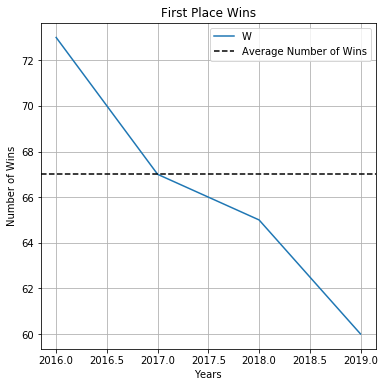

In [51]:
# Display Line Graph 
first_place_df_c.plot.line(grid = True, figsize= (6,6))

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("First Place Wins")
plt.xlabel("Years")
plt.ylabel("Number of Wins")
plt.axhline(y=67, color="black",label = "Average Number of Wins",linestyle='dashed')
plt.legend()
# Save Graph
plt.savefig("First Place Wins.png")

In [46]:
# Calculate Average Number of Wins for first place
first_place_mean = first_place_df_c["W"].mean()
first_place_mean

66.25

In [47]:
# Group Teams by year and sort Wins highest to lowest
sixteen_place = wins_loses_df.sort_values(by=["Year","W"], ascending=False).groupby('Year')

# Select the sixteenth row (Sixteenth Place)
sixteen_place_df = sixteen_place.nth(16)
sixteen_place_df

# Drop 2020 Values 
sixteen_place_df_a = sixteen_place_df.drop(labels=2020)
sixteen_place_df_b = sixteen_place_df_a.drop(labels="GP", axis=1)
sixteen_place_df_c = sixteen_place_df_b.drop(labels="L", axis=1)
sixteen_place_df_c

,TEAM,W
Year,,
2016,Houston Rockets,41
2017,Portland Trail Blazers,41
2018,Washington Wizards,43
2019,Charlotte Hornets,39


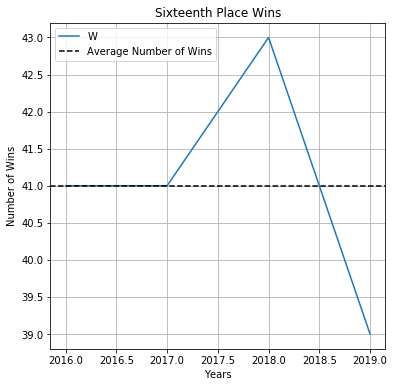

In [48]:
# Display Line Graph 
sixteen_place_df_c.plot.line(grid = True, figsize= (6,6))

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("Sixteenth Place Wins")
plt.xlabel("Years")
plt.ylabel("Number of Wins")
plt.axhline(y=41, color="black",label = "Average Number of Wins",linestyle='dashed')
plt.legend()
# Save Graph
plt.savefig("Sixteen Place Wins.png")

In [32]:
# Calculate Average Number of Wins for first place
sixteen_place_mean = sixteen_place_df_c["W"].mean()
sixteen_place_mean

41.0